In [ ]:
#first we read and clean data
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df.info()
print("data set size:",df.shape)
print("data set size:",df.describe())
print("data set :\n",df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
data set size: (8807, 12)
data set size:        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
data set :
      show_id     ty

In [4]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
print(f"the missing value\n:{df.isnull()}")
print(f"{df.head()}")

the missing value
:      show_id   type  title  director   cast  country  date_added  \
0       False  False  False     False   True    False       False   
1       False  False  False      True  False    False       False   
2       False  False  False     False  False     True       False   
3       False  False  False      True   True     True       False   
4       False  False  False      True  False    False       False   
...       ...    ...    ...       ...    ...      ...         ...   
8802    False  False  False     False  False    False       False   
8803    False  False  False      True   True     True       False   
8804    False  False  False     False  False    False       False   
8805    False  False  False     False  False    False       False   
8806    False  False  False     False  False    False       False   

      release_year  rating  duration  listed_in  description  
0            False   False     False      False        False  
1            False   False

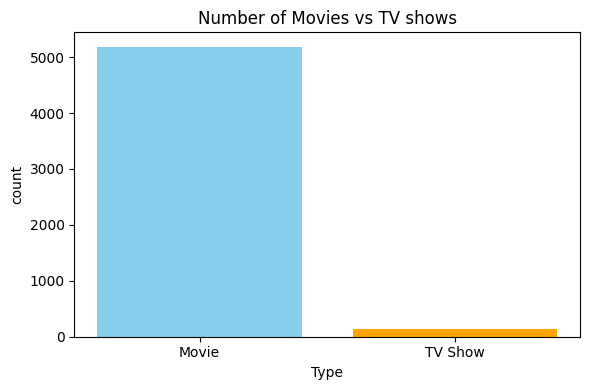

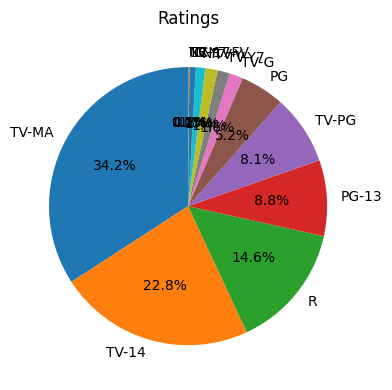

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5700\2366449088.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)#here we also replace ( min) with ""


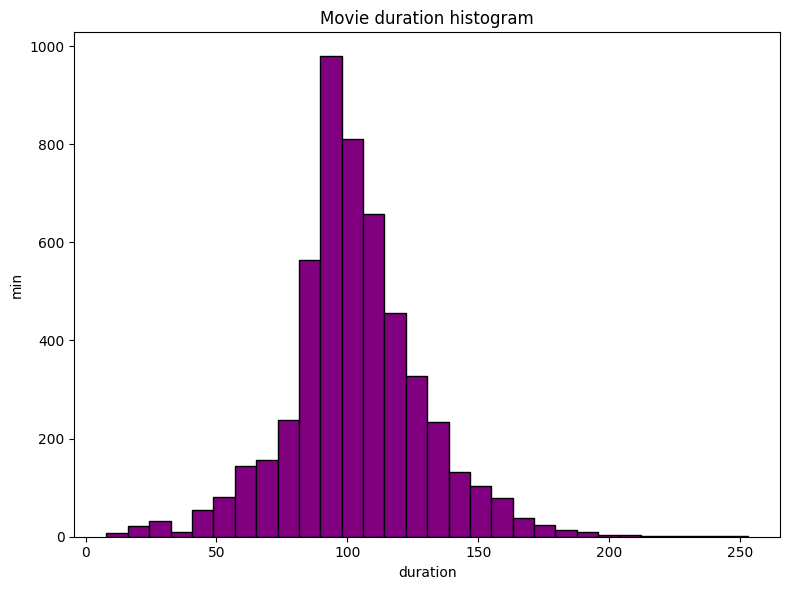

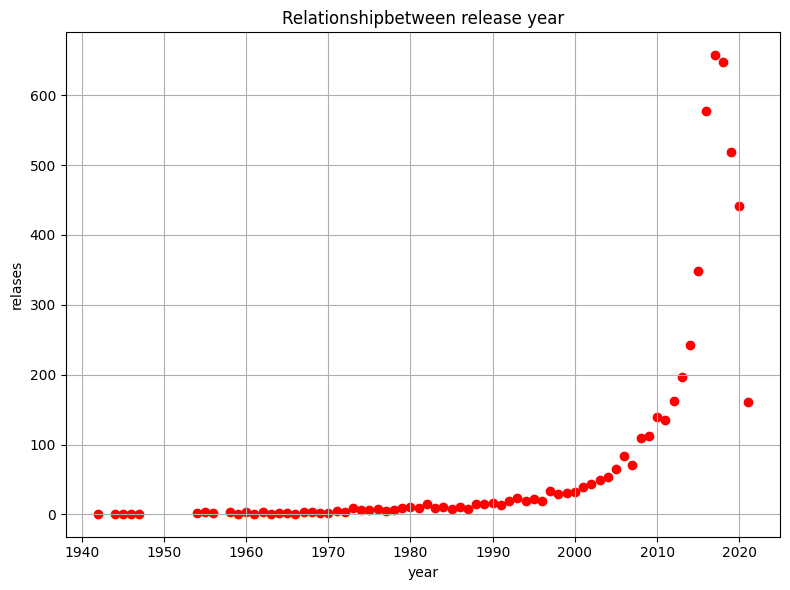

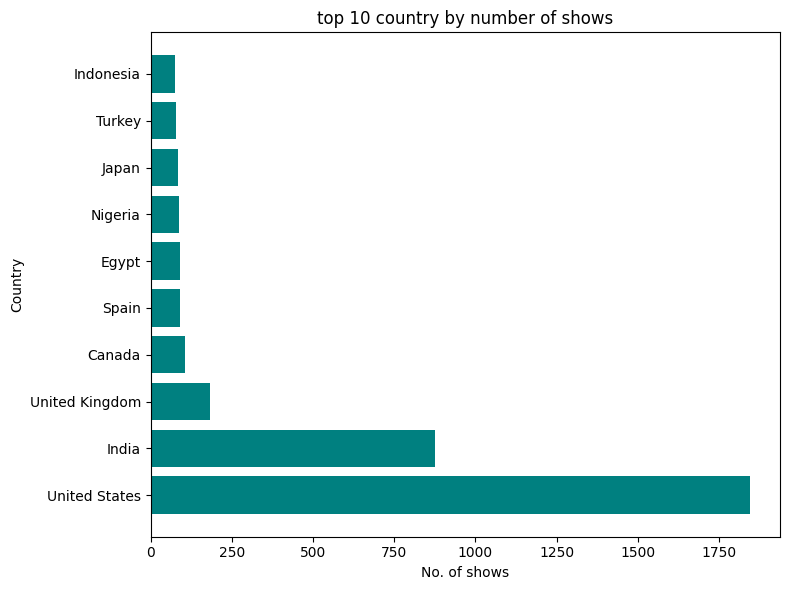

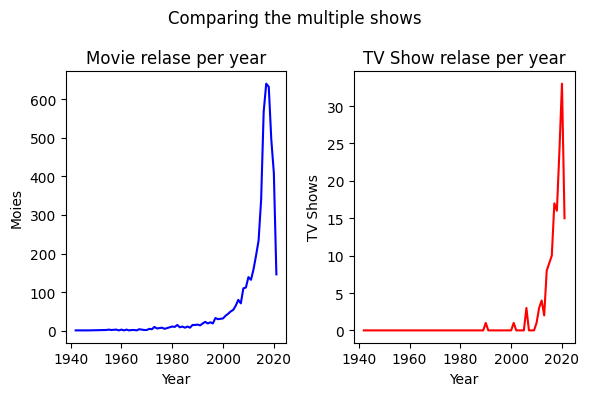

In [22]:
#clean data
import matplotlib.pyplot as plt
import pandas as pd
df=df.dropna(subset=['type','release_year','rating','duration','country'])
type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','orange'])
plt.title("Number of Movies vs TV shows")
plt.xlabel("Type")
plt.ylabel("count")
plt.tight_layout()
plt.savefig("Movies_vs_TVshows.png")
plt.show()

ratings_pie=df['rating'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(ratings_pie,labels=ratings_pie.index,autopct='%1.1f%%',startangle=90)
plt.title("Ratings")
plt.tight_layout()
plt.savefig("ratings.png")
plt.show()

movie_df=df[df['type']=='Movie']
movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)#here we also replace ( min) with ""
plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color="purple",edgecolor="black")
plt.title("Movie duration histogram")
plt.xlabel("duration")
plt.ylabel("min")
plt.tight_layout()
plt.savefig("Movie_durations.png")
plt.show()

relases_count=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.scatter(relases_count.index,relases_count.values,color="red",marker='o')
plt.title("Relationshipbetween release year")
plt.xlabel("year")
plt.ylabel("relases")
plt.grid()
plt.tight_layout()
plt.savefig("Releses_year.png")
plt.show()

top_countries=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(top_countries.index,top_countries.values,color='teal')
plt.title("top 10 country by number of shows")
plt.xlabel("No. of shows")
plt.ylabel("Country")

plt.tight_layout()
plt.savefig("Top10country.png")
plt.show()


df_year_content=df.groupby(['release_year','type']).size().unstack().fillna(0)
fig, ax=plt.subplots(1,2,figsize=(6,4))
ax[0].plot(df_year_content.index,df_year_content['Movie'],color='blue')
ax[0].set_title("Movie relase per year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Moies")
fig.suptitle("Comparing the multiple shows")
ax[1].plot(df_year_content.index,df_year_content['TV Show'],color='red')
ax[1].set_title("TV Show relase per year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("TV Shows")
plt.tight_layout()
plt.savefig("Comparin_Multiple_shows.png")
plt.show()